In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()

### Prepere data

In [158]:
df0=pd.read_csv('Sales_April_2019.csv')
df1=pd.read_csv('Sales_August_2019.csv')
pd2=pd.read_csv('Sales_December_2019.csv')
pd3=pd.read_csv('Sales_February_2019.csv')
pd4=pd.read_csv('Sales_January_2019.csv')
pd5=pd.read_csv('Sales_July_2019.csv')
pd6=pd.read_csv('Sales_June_2019.csv')
pd7=pd.read_csv('Sales_March_2019.csv')
pd8=pd.read_csv('Sales_May_2019.csv')
pd9=pd.read_csv('Sales_November_2019.csv')
pd10=pd.read_csv('Sales_October_2019.csv')
pd11=pd.read_csv('Sales_September_2019.csv')

In [159]:
df = pd.concat([df0, df1, pd2, pd3,pd4,pd5,pd6,pd7,pd8,pd9,pd10,pd11], ignore_index=True)

In [160]:
# Clean data

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [162]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [163]:
df.dropna(inplace=True)

In [164]:
drop = df[df['Order Date'] == 'Order Date'].index
df.drop(drop,axis=0 ,inplace=True)

In [165]:
df.loc[516:519]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
516,177052,USB-C Charging Cable,2,11.95,04/02/19 09:30,"532 Walnut St, San Francisco, CA 94016"
517,177053,Wired Headphones,1,11.99,04/24/19 20:45,"5 Adams St, Boston, MA 02215"
518,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"


In [166]:
df['Order Date']= pd.to_datetime(df['Order Date'])

C:\Users\cykad\AppData\Local\Temp\ipykernel_15788\3163393989.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [167]:
df['Month']=df['Order Date'].apply(lambda x : x.month)

In [168]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

In [169]:
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [170]:
df['Total']=df['Quantity Ordered']*df['Price Each']

In [171]:
df['Month']=df['Month'].astype('int32')

### Compare by time

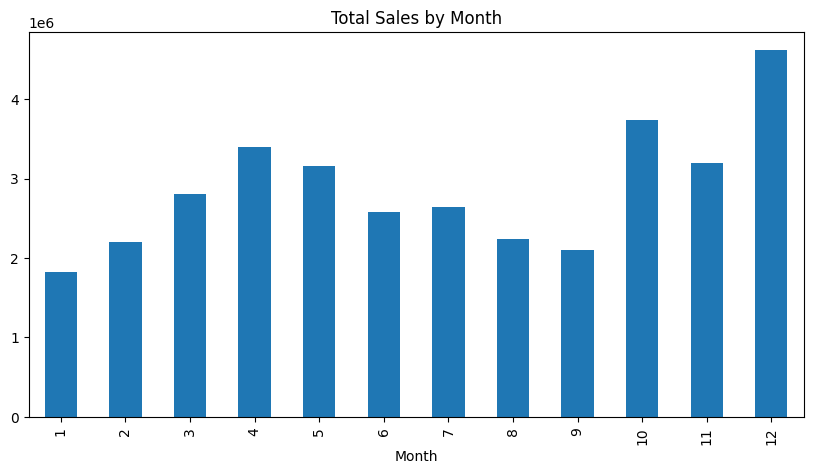

In [172]:
df.groupby('Month')['Total'].sum().plot(kind='bar',figsize=(10,5), title='Total Sales by Month');

In [173]:
df['Hour'] = df['Order Date'].apply(lambda x : x.hour)

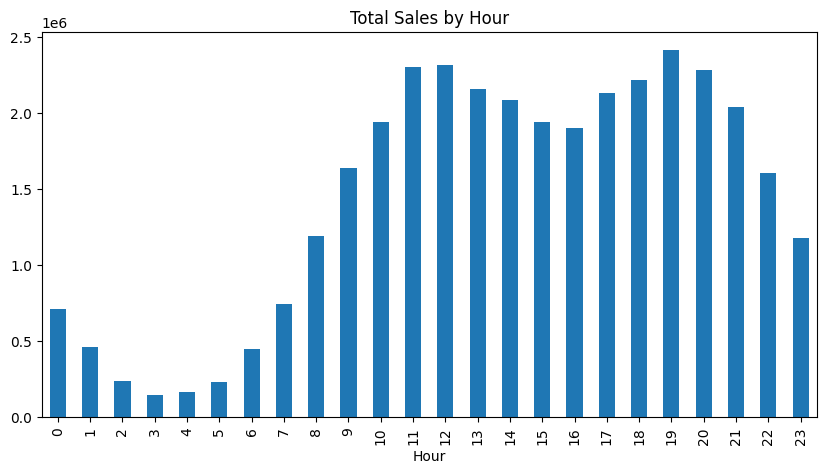

In [174]:
df.groupby('Hour')['Total'].sum().plot(kind='bar',figsize=(10,5), title='Total Sales by Hour');

### Compare by Place

In [175]:
df['City'] = df['Purchase Address'].apply(lambda x : x.split(',')[1])

In [176]:
df['State'] = df['Purchase Address'].apply(lambda x : x.split(',')[2][:3])

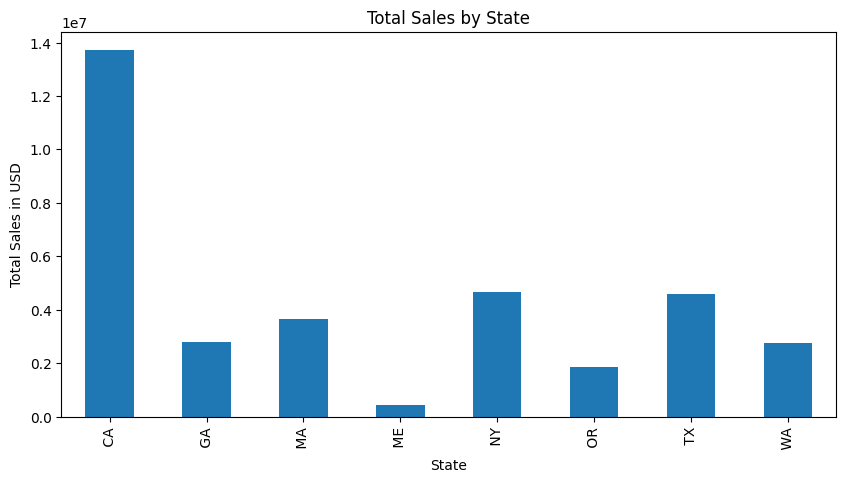

In [177]:
ax = df.groupby(df['State'])['Total'].sum().plot(kind='bar',figsize=(10,5), title='Total Sales by State',ylabel='Total Sales in USD');

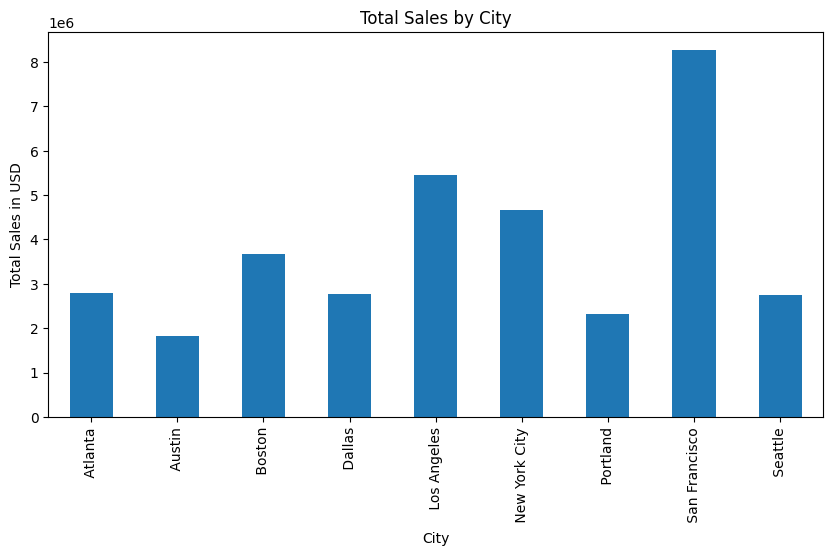

In [178]:
ax = df.groupby('City')['Total'].sum().plot(kind='bar',figsize=(10,5), title='Total Sales by City',ylabel='Total Sales in USD');

### Products Comparison

In [179]:
dff = df[df['Order ID'].duplicated(keep=False)]

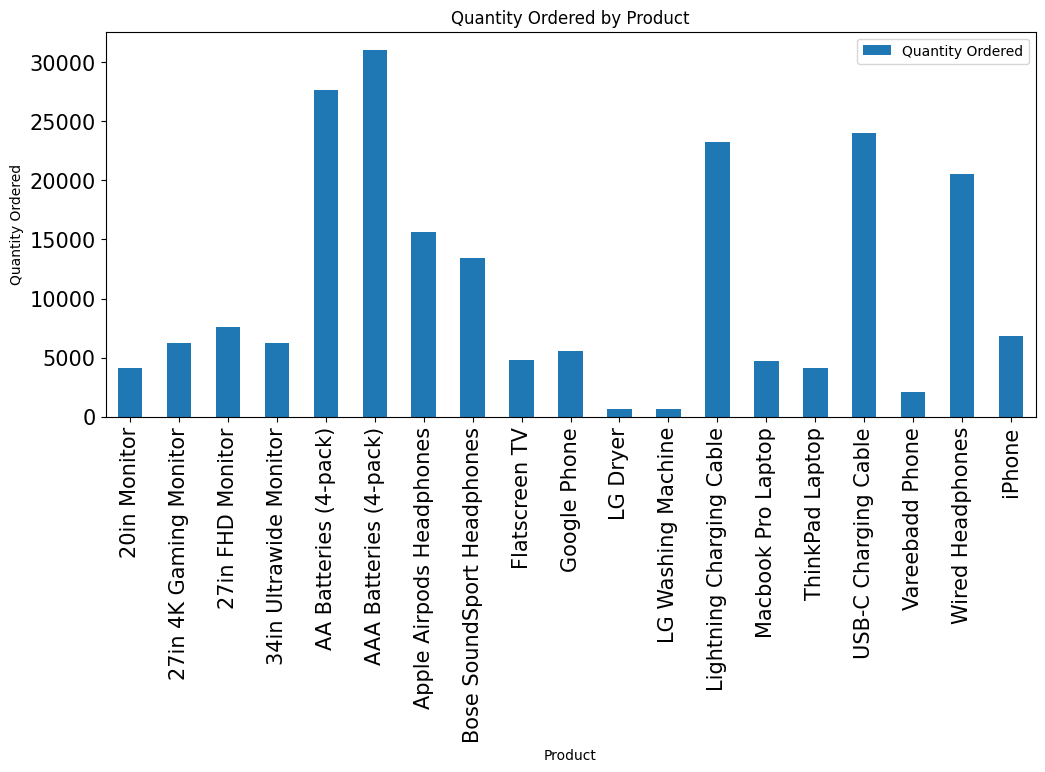

In [180]:
df.loc[:, ['Quantity Ordered', 'Product']].groupby('Product').sum().plot(kind='bar',figsize=(12,5),fontsize=15, title='Quantity Ordered by Product',ylabel='Quantity Ordered');

In [181]:
product_df = df.loc[:, ['Quantity Ordered','Price Each', 'Product']].groupby('Product').sum()

In [182]:
product_df['Avg Price'] = product_df['Price Each']/product_df['Quantity Ordered']

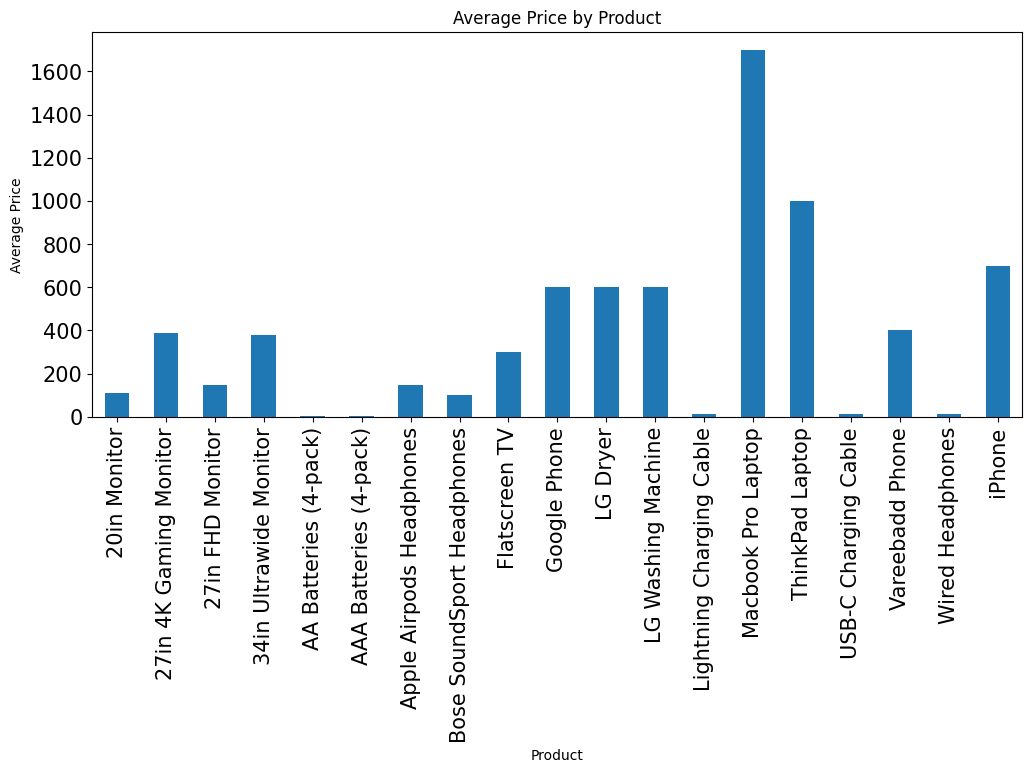

In [183]:
product_df['Avg Price'].plot(kind='bar',figsize=(12,5),fontsize=15, title='Average Price by Product',ylabel='Average Price');

In [185]:
cross_tab = df[df['Order ID'].duplicated(keep=False)]
cross_tab = pd.crosstab(cross_tab['Order ID'],cross_tab['Product'])
cross_tab

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
141290,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
141365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
141384,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
141450,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319536,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
319556,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
319584,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [186]:
#create new matrix from df(0-1)
prod_matrix = pd.DataFrame(data = cross_tab.values.T@cross_tab.values, columns = cross_tab.columns, index = cross_tab.columns)
prod_matrix

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Product,,,,,,,,,,,,,,,,,,,
20in Monitor,165,2,5,2,16,11,13,15,2,4,0,2,26,6,2,25,0,19,3
27in 4K Gaming Monitor,2,261,8,6,26,30,22,19,5,6,2,1,34,13,5,23,3,29,9
27in FHD Monitor,5,8,312,10,26,43,24,26,6,8,3,1,36,9,6,43,2,22,2
34in Ultrawide Monitor,2,6,10,260,32,25,14,17,8,5,0,1,33,7,4,26,4,28,13
AA Batteries (4-pack),16,26,26,32,838,87,70,55,21,25,6,1,106,17,17,75,12,83,32
AAA Batteries (4-pack),11,30,43,25,87,911,81,57,21,22,2,4,80,18,27,95,6,86,31
Apple Airpods Headphones,13,22,24,14,70,81,1022,50,13,21,3,1,116,19,16,63,12,100,373
Bose SoundSport Headphones,15,19,26,17,55,57,50,874,13,228,0,2,72,15,13,102,82,74,12
Flatscreen TV,2,5,6,8,21,21,13,13,190,4,1,0,22,5,6,17,3,11,10


In [187]:
prod_matrix.iplot(kind='heatmap',colorscale="Blues",size=(20,10),title='Heatmap of Products',xTitle='Product',yTitle='Product')